In [1]:
#General imports
resol = 300
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import pandas as pd

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "axes.linewidth": 0.7,
    "xtick.major.width": 0.6,
    "ytick.major.width": 0.6,
})

import sys
import numpy as np
from pathlib import Path
pi = np.pi

project_root = Path().resolve().parents[0]
sys.path.append(str(project_root))

#Local imports
from scripts_experiments.reflection_convergence_vs_n import run_reflection_vs_n

<h2> Execute the experiment </h2>

Given an off-resonant scattering experiment, I check the convergence of the coincidence against $\Lambda_{\rm UV}$ for $\Lambda_{\rm IR} = 0$ for different values of $n$.

In [22]:
#Prepare the photon frequencies
omega_q_tab = [10*pi, 9.75*pi, 9.5*pi]
ir_val = 2*pi

n_bare_tab = np.array([0,1,2,3,4,30])

nb_freq_window = 10
ir_tab = ir_val + np.zeros(nb_freq_window)
uv_tab = np.linspace(16*pi, 100*pi, nb_freq_window)

#for q in range(len(omega_q_tab)):
for q in [1,2]:

    index_omega_q = q + 1
    omega_q = omega_q_tab[q]
    
    for n in n_bare_tab:
        print("Running n = ", n, " out of ", len(n_bare_tab))
        _, _, coincidence_tab = run_reflection_vs_n(omega_q, ir_tab, uv_tab, index_omega_q, n, 
                                                     store_results=True, progress=True)
        
        print("------------- \n")

Running n =  0  out of  6


100%|██████████| 10/10 [00:05<00:00,  1.71it/s]


------------- 

Running n =  1  out of  6


100%|██████████| 10/10 [00:05<00:00,  1.71it/s]


------------- 

Running n =  2  out of  6


100%|██████████| 10/10 [00:05<00:00,  1.71it/s]


------------- 

Running n =  3  out of  6


100%|██████████| 10/10 [00:05<00:00,  1.68it/s]


------------- 

Running n =  4  out of  6


100%|██████████| 10/10 [00:05<00:00,  1.69it/s]


------------- 

Running n =  30  out of  6


100%|██████████| 10/10 [00:05<00:00,  1.67it/s]


------------- 

Running n =  0  out of  6


100%|██████████| 10/10 [00:05<00:00,  1.69it/s]


------------- 

Running n =  1  out of  6


100%|██████████| 10/10 [00:05<00:00,  1.69it/s]


------------- 

Running n =  2  out of  6


100%|██████████| 10/10 [00:05<00:00,  1.68it/s]


------------- 

Running n =  3  out of  6


100%|██████████| 10/10 [00:05<00:00,  1.68it/s]


------------- 

Running n =  4  out of  6


100%|██████████| 10/10 [00:05<00:00,  1.68it/s]


------------- 

Running n =  30  out of  6


100%|██████████| 10/10 [00:06<00:00,  1.66it/s]

------------- 



<h1> Results </h1>

In [28]:
omega_A = 10*pi
Gamma = pi
delta_q = 0.05*pi

omega_q_tab = [10*pi, 9.75*pi, 9.5*pi]
ir_val = 2*pi
index_omega_q = 3

#Theoretical value
R_theory_physical = 1 / (1 + ((omega_q_tab[index_omega_q-1] - omega_A)/ (Gamma/2))**2)
theoretical_val = R_theory_physical


n_bare_tab = np.arange(1000)
coincidence_to_plot = []
relative_errors_to_plot = []
lbda_tab_to_plot = []

for i in range(len(n_bare_tab)):
    #Recover the data
    try:
        data_file = f"../results/csv_files/reflection_vs_n{n_bare_tab[i]}_ir{int(ir_val/pi)}_{index_omega_q}.csv"

        df = pd.read_csv(data_file)
        coincidence_to_plot.append(df['reflection_tab'].to_numpy())
        ir_tab = df['ir_tab'].to_numpy()
        uv_tab = df['uv_tab'].to_numpy()
        lbda_tab_to_plot.append(0.5*(uv_tab - ir_tab))

        #Comparision with theoretical value for each scattering experiment
        relative_errors_to_plot.append(np.abs(coincidence_to_plot[-1] - theoretical_val) / theoretical_val)
    except Exception:
        pass

Create the figure

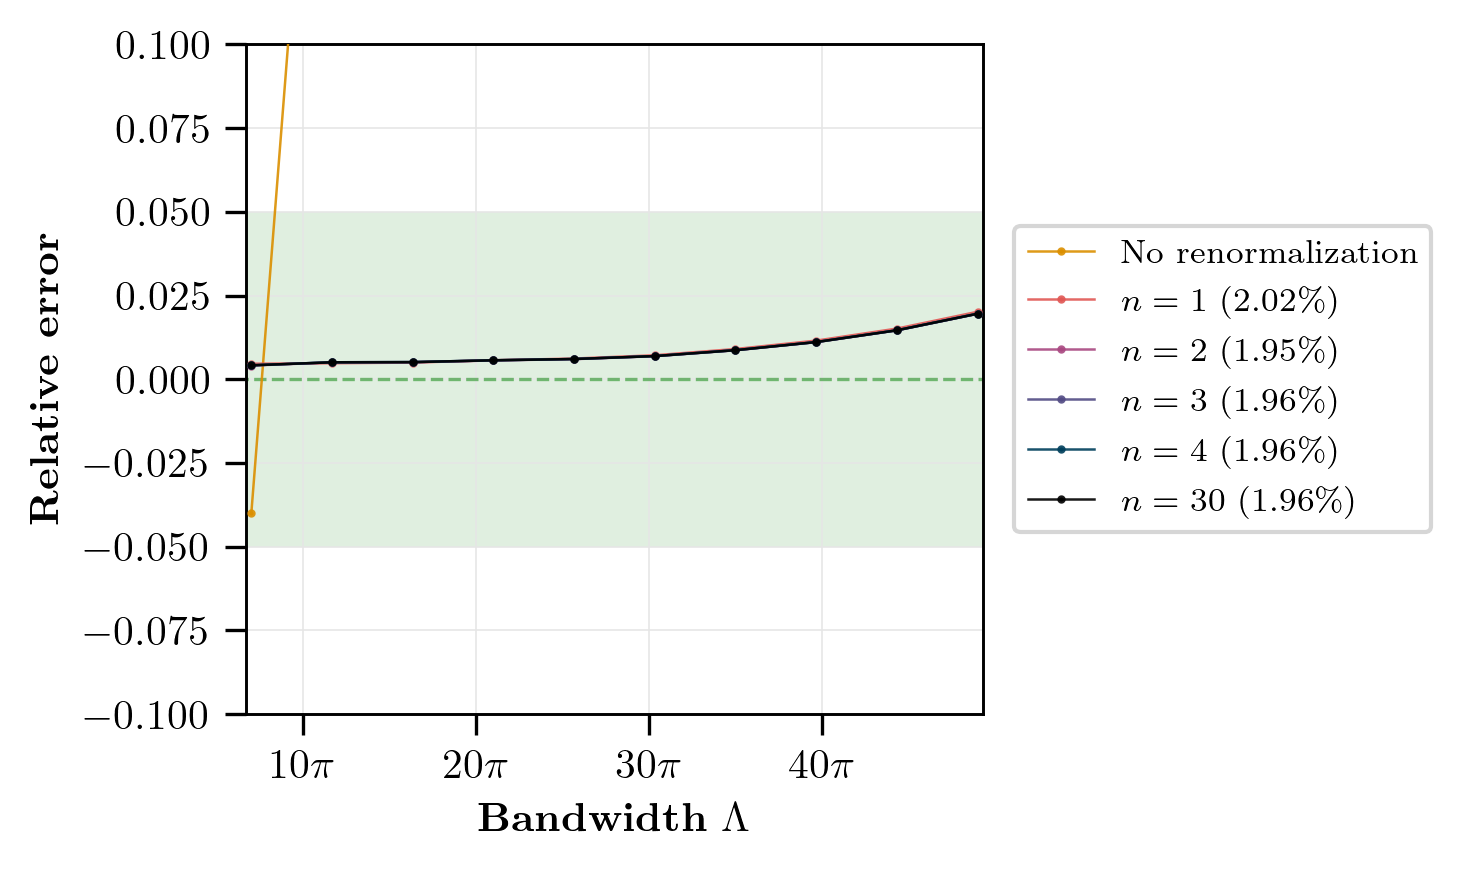

In [29]:
# Figure setup (même ADN que ta figure de référence)
fig, ax = plt.subplots(figsize=(5, 3), dpi=300)

# Palette sobre + markers distincts
colors  = ["#db8f00", "#e05754", "#a94881", "#524b84", '#003f5c', 'black']
labels  = [r'No renormalization', r'$n = 1$', r'$n = 2$', r'$n = 3$', r'$n = 4$', r'$n=30$']
lbda_conv = np.zeros(len(lbda_tab_to_plot))

# Scatter plots
for i in range(len(lbda_tab_to_plot)):
    #Index where the curve enters the 5% confidence region
    if i > 0:
        if (relative_errors_to_plot[i][-1] < 0.05):
            lbda_conv[i] = lbda_tab_to_plot[i][np.where(relative_errors_to_plot[i] < 0.05)[0][0]]
        else:
            lbda_conv[i] = np.inf
        
        #Relative error in the label
        labels[i] += f' ({relative_errors_to_plot[i][-1]*100:.2f}\\%)'

    ax.plot(
        lbda_tab_to_plot[i],
        (coincidence_to_plot[i] - theoretical_val) / theoretical_val,
        marker="o",
        color=colors[i],
        label = labels[i],
        markersize=1,
        linewidth=0.6,
        alpha=0.9,
        zorder=3
    )

#5% confidence region
ax.hlines(0, 0, 100*pi,color='green', alpha=0.5, linewidth=0.8, linestyle='--')
ax.fill_between(np.linspace(0, 100*pi, 100),
                -0.05,
                0.05,color='green',alpha=0.12,linewidth=0, zorder=1)


#legend outside the plot
ax.legend(
    prop={'size': 8},
    frameon=True,
    loc='center left',
    bbox_to_anchor=(1.02, 0.5)
)

#Switch the x-axis in pi units
ax.xaxis.set_major_locator(ticker.MultipleLocator(base=10*pi)) 
ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{x/pi:.0f}$\\pi$'))
ax.set_xlim([lbda_tab_to_plot[0][0] - 1, lbda_tab_to_plot[0][-1] + 1])

ax.set_ylim([-0.1,0.1])

# Labels
ax.set_xlabel(r'\textbf{Bandwidth} $\Lambda$', fontsize=13)
ax.set_ylabel(r'\textbf{Relative error}', fontsize=13)

#grid
ax.grid(color='0.9', linestyle='-', linewidth=0.4)


# Tick appearance
ax.tick_params(axis='both', which='major', length=5, width=0.8)
ax.tick_params(axis='both', which='minor', length=3, width=0.6)

#font size
for item in [ax.xaxis.label, ax.yaxis.label]:
    item.set_fontsize(10)

for item in (ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(10)

plt.tight_layout()
#plt.savefig(f'../results/fig/coincidence_vs_n_ir{int(ir_tab[0]/pi)}_{index_omega_q}.pdf')
plt.show()